# Breast Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
256,88649001,M,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,...,36.27,178.60,1926.0,0.1281,0.53290,0.42510,0.19410,0.2818,0.10050,NaN
348,898690,B,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,...,20.79,79.67,475.8,0.1531,0.11200,0.09823,0.06548,0.2851,0.08763,NaN
431,907915,B,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,22.91,89.61,515.8,0.1450,0.26290,0.24030,0.07370,0.2556,0.09359,NaN
80,861103,B,11.450,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,...,32.16,84.53,525.1,0.1557,0.16760,0.17550,0.06127,0.2762,0.08851,NaN
133,867387,B,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,19.25,114.30,922.8,0.1223,0.19490,0.17090,0.13740,0.2723,0.07071,NaN
240,88350402,B,13.640,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,...,19.05,94.11,683.4,0.1278,0.12910,0.15330,0.09222,0.2530,0.06510,NaN
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,NaN
377,9013579,B,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,...,35.63,97.11,680.6,0.1108,0.14570,0.07934,0.05781,0.2694,0.07061,NaN
168,8712766,M,17.470,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.10430,...,32.33,155.30,1660.0,0.1376,0.38300,0.48900,0.17210,0.2160,0.09300,NaN
311,89382601,B,14.610,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,...,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,NaN


In [3]:
df=df.drop(['id','Unnamed: 32'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Train test split

In [6]:
X=df.drop(columns='diagnosis',axis =1)
y=df['diagnosis']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Eda

In [9]:
corr_matrix=df.corr()

C:\Users\amira\AppData\Local\Temp\ipykernel_20264\1544550014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


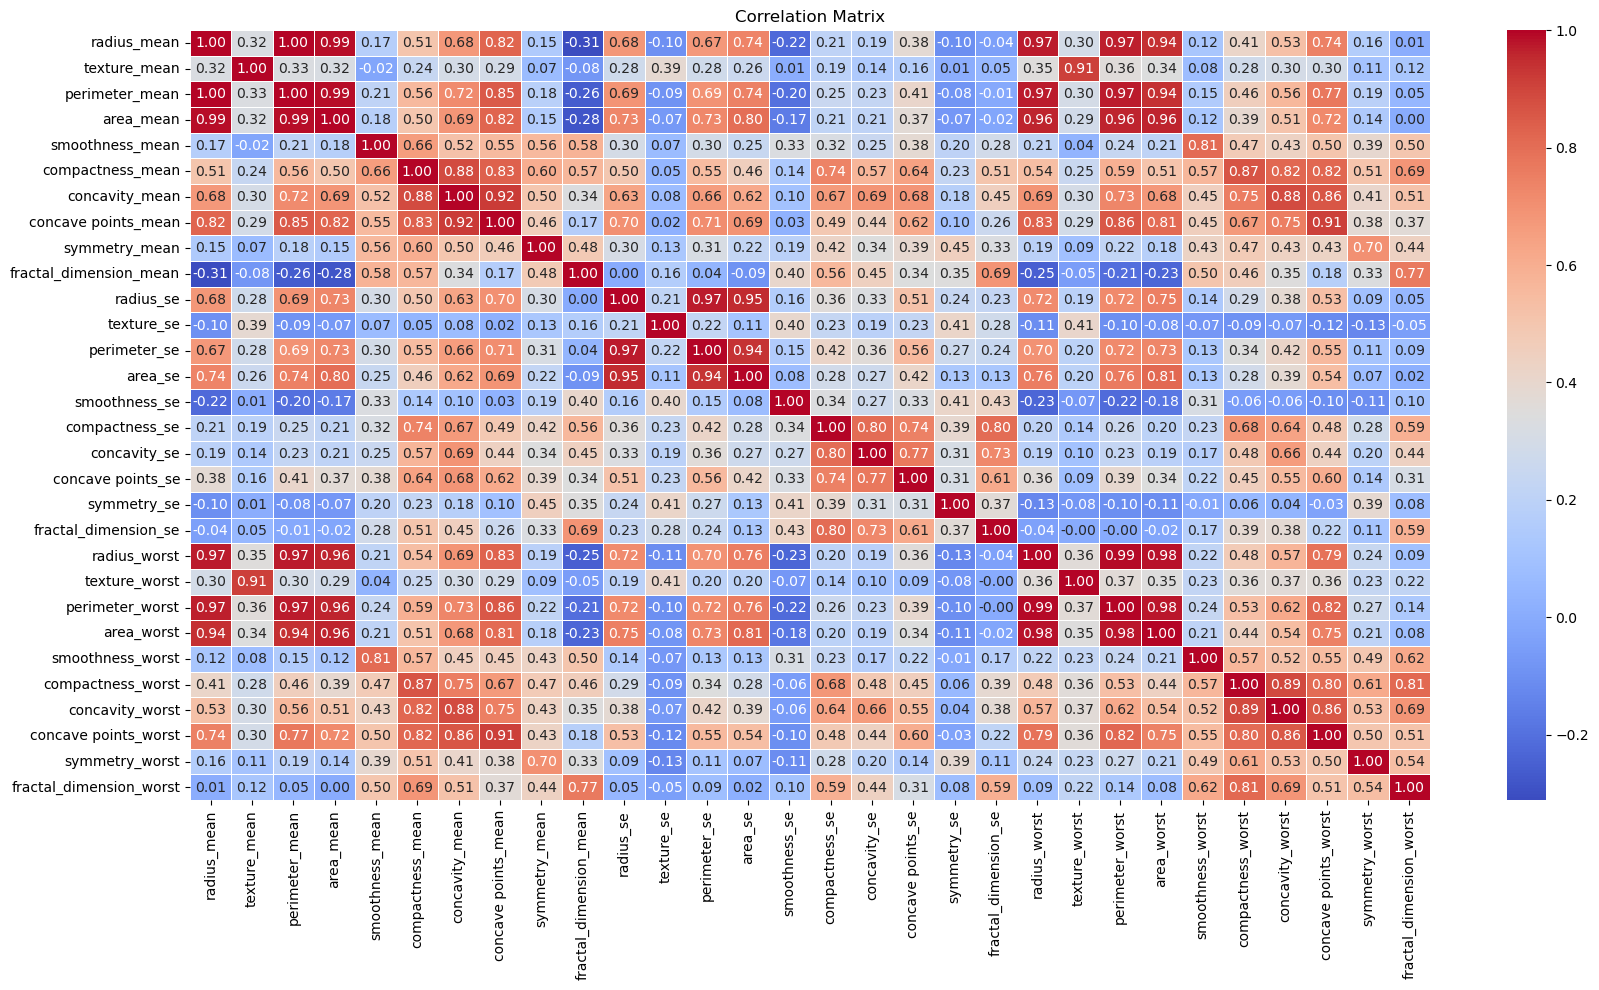

In [10]:
plt.figure(figsize=(20, 10))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Selection

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [12]:
from sklearn.metrics import accuracy_score
prediction=model.predict(X_test)
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

0.9649122807017544


In [13]:
import pickle

In [14]:
filename='breast_model.sav'
pickle.dump(model,open(filename,'wb')) 

In [15]:
loaded_model=pickle.load(open('breast_model.sav','rb'))

In [16]:
type(loaded_model)

sklearn.linear_model._logistic.LogisticRegression